In [2]:
file_path = r"C:\unibo-dtm-ml-2526-cervical-cancer-predictor\data\raw.csv"
with open(file_path, 'r') as f:
    lines = f.readlines()
print('Read {} lines'.format(len(lines)))

Read 859 lines


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
df = pd.read_csv(file_path)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

### Dataset Description

1. **`Age`**: Patient's age in years.
2. **`Number of sexual partners`**: Lifetime total of sexual partners.
3. **`First sexual intercourse`**: Age (years) at first sexual encounter.
4. **`Num of pregnancies`**: Total number of pregnancies.
5. **`Smokes`**: Binary indicator (1=Yes, 0=No) if the patient currently smokes.
6. **`Smokes (years)`**: Total duration of smoking habit in years.
7. **`Smokes (packs/year)`**: Average number of cigarette packs consumed per year.
8. **`Hormonal Contraceptives`**: Binary indicator (1=Yes, 0=No) for hormonal birth control use.
9. **`Hormonal Contraceptives (years)`**: Total duration of hormonal contraceptive use in years.
10. **`IUD`**: Binary indicator (1=Yes, 0=No) for the presence of an Intrauterine Device.
11. **`IUD (years)`**: Total duration of IUD use in years.
12. **`STDs`**: Binary indicator (1=Yes, 0=No) for any history of sexually transmitted diseases.
13. **`STDs (number)`**: Total count of different types of STDs contracted by the patient.
14. **`STDs:condylomatosis`**: Binary indicator for history of genital warts.
15. **`STDs:cervical condylomatosis`**: Binary indicator for warts specifically on the cervix.
16. **`STDs:vaginal condylomatosis`**: Binary indicator for warts specifically in the vagina.
17. **`STDs:vulvo-perineal condylomatosis`**: Binary indicator for warts on external genitalia.
18. **`STDs:syphilis`**: Binary indicator for history of Syphilis infection.
19. **`STDs:pelvic inflammatory disease`**: Binary indicator for history of PID.
20. **`STDs:genital herpes`**: Binary indicator for history of Herpes infection.
21. **`STDs:molluscum contagiosum`**: Binary indicator for history of Molluscum contagiosum.
22. **`STDs:AIDS`**: Binary indicator for history of AIDS (typically 0 in this dataset).
23. **`STDs:HIV`**: Binary indicator for history of HIV infection.
24. **`STDs:Hepatitis B`**: Binary indicator for history of Hepatitis B.
25. **`STDs:HPV`**: Binary indicator for history of Human Papillomavirus.
26. **`STDs: Number of diagnosis`**: Total number of confirmed STD diagnoses.
27. **`STDs: Time since first diagnosis`**: Years elapsed since the patient's first STD diagnosis.
28. **`STDs: Time since last diagnosis`**: Years elapsed since the patient's most recent STD diagnosis.
29. **`Dx:Cancer`**: Clinical history indicating if the patient was previously diagnosed with cancer.
30. **`Dx:CIN`**: History of Cervical Intraepithelial Neoplasia (precancerous condition).
31. **`Dx:HPV`**: History of a clinical HPV diagnosis.
32. **`Dx`**: General indicator of any previous medical diagnosis.
33. **`Hinselmann`**: Target 1: Result of colposcopy (abnormal visual exam).
34. **`Schiller`**: Target 2: Result of Lugol's iodine staining test (staining abnormalities).
35. **`Citology`**: Target 3: Result of a Pap smear (cytological cell analysis).
36. **`Biopsy`**: Target 4: Result of tissue sample analysis (histological gold standard).



### Data Profiling

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

#### Downsides list 
As things stand, we are definetely not happy with what we've understood so far: 
- Missing values are not simply empty cells, but rather they're marked by a "?" sign implying that the value is unkown. This means that there are no missing entries (count=858 for all columns), yet those cells that would have been empty are filled with the aforementioned string value. 
- Columns containing such missing values are characterized by the "object" data type because they both store numerical (normally registered entries) and string information (the "?" marks indeed). 
- No mathematically-backed formulae can be performed on object values, as we see from the table above, thus meaning that no relevant distribution information can be inferred by columns affected by such values. 
- I presume that all the other columns with DType == int64 are complete, but this will be certified upon deeper inspection of the dataset. 



### Room for work
1. Deal with the missing values. First of all, I need to get rid of the "?" signs. Further preprocessing steps will be covered on those cells affected by the removal. 


In [8]:
# Reshaping the dataframe. This time the '?' values are considered as NaN values.
df = pd.read_csv(r'C:\unibo-dtm-ml-2526-cervical-cancer-predictor\data\raw.csv',na_values='?')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [9]:
df.infer_objects().dtypes



Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

### Actual Data Profiling
Now that I've changed the dtype of the "object" dtype of the various attributes, it is possible to carry out Data Profiling and expose the true nature of the dataset. By this I mean that, since in the earlier case all columns with missing data were characterized by "object" data type, there seemed to be no problem with missing entries: all values, including numerical (right) and "?" (missing) ones were recognized as existent. 
What I realistically expect after running the cell below is to get the real structure of the dataset, where all previous "?" entries are NaN values, hence excluded from the counting. Many missing values will likely pop up in all the previous dtype == object columns.  

In [26]:
print("\nDataset Info: \n")
print(df.info())
print("\nMissing Values: \n")
print(df.isnull().sum()) 
print("\nDuplicate Values: \n")
print(df.duplicated().sum())
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                        

#### Takeaways from this showcase
There's some of them that deserve to be highlighted: 
- Missing values do exist, and there's a lot of them: only the "Age", "STDs: Number of diagnosis", and the last columns from "Dx: Cancer" are complete. All the other colums are characterized by missing values at different levels of severity. To make things clearer, we can divide these troublesome columns in three "zones": 
    - A "yellow" zone consisting of columns 1 (index from 0) to 6. These columns have less than 100 missing values. Some of them have very few of them. Inputation will likely be performed.  
    - A "red" zone consisting of columns 7 to 24. These columns have between 101 and 117 missing values. Inputation could be a possibility for this zone too. 
    - A "purple" zone consisting of columns 26 and 27. The amount of missing values affecting these two columns may want to see them from the opposite view: there's only 71 valid entries in both the two columns! Inputation is definetely not a thing in this case: these columns will likely be dropped. 
- A significant amount of duplicate values: 23 duplicates were spotted, composing nearly the 3% of the whole dataset. Their noticeable presence will surely affect future modelling performance, hence they will be likely dropped. 
- High class imbalance: diagnostic tests (the last 4 columns) are characterized by very low values for the mean, thus indicating that, as it was expected from a medical dataset, data greatly tend towards negativity to the tests. 

It is now time to perform some Visual Profiling, which definetely helps better inquadrate the issues just exposed. 


##### MISSING DATA VISUALIZATION

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.62x0.77)


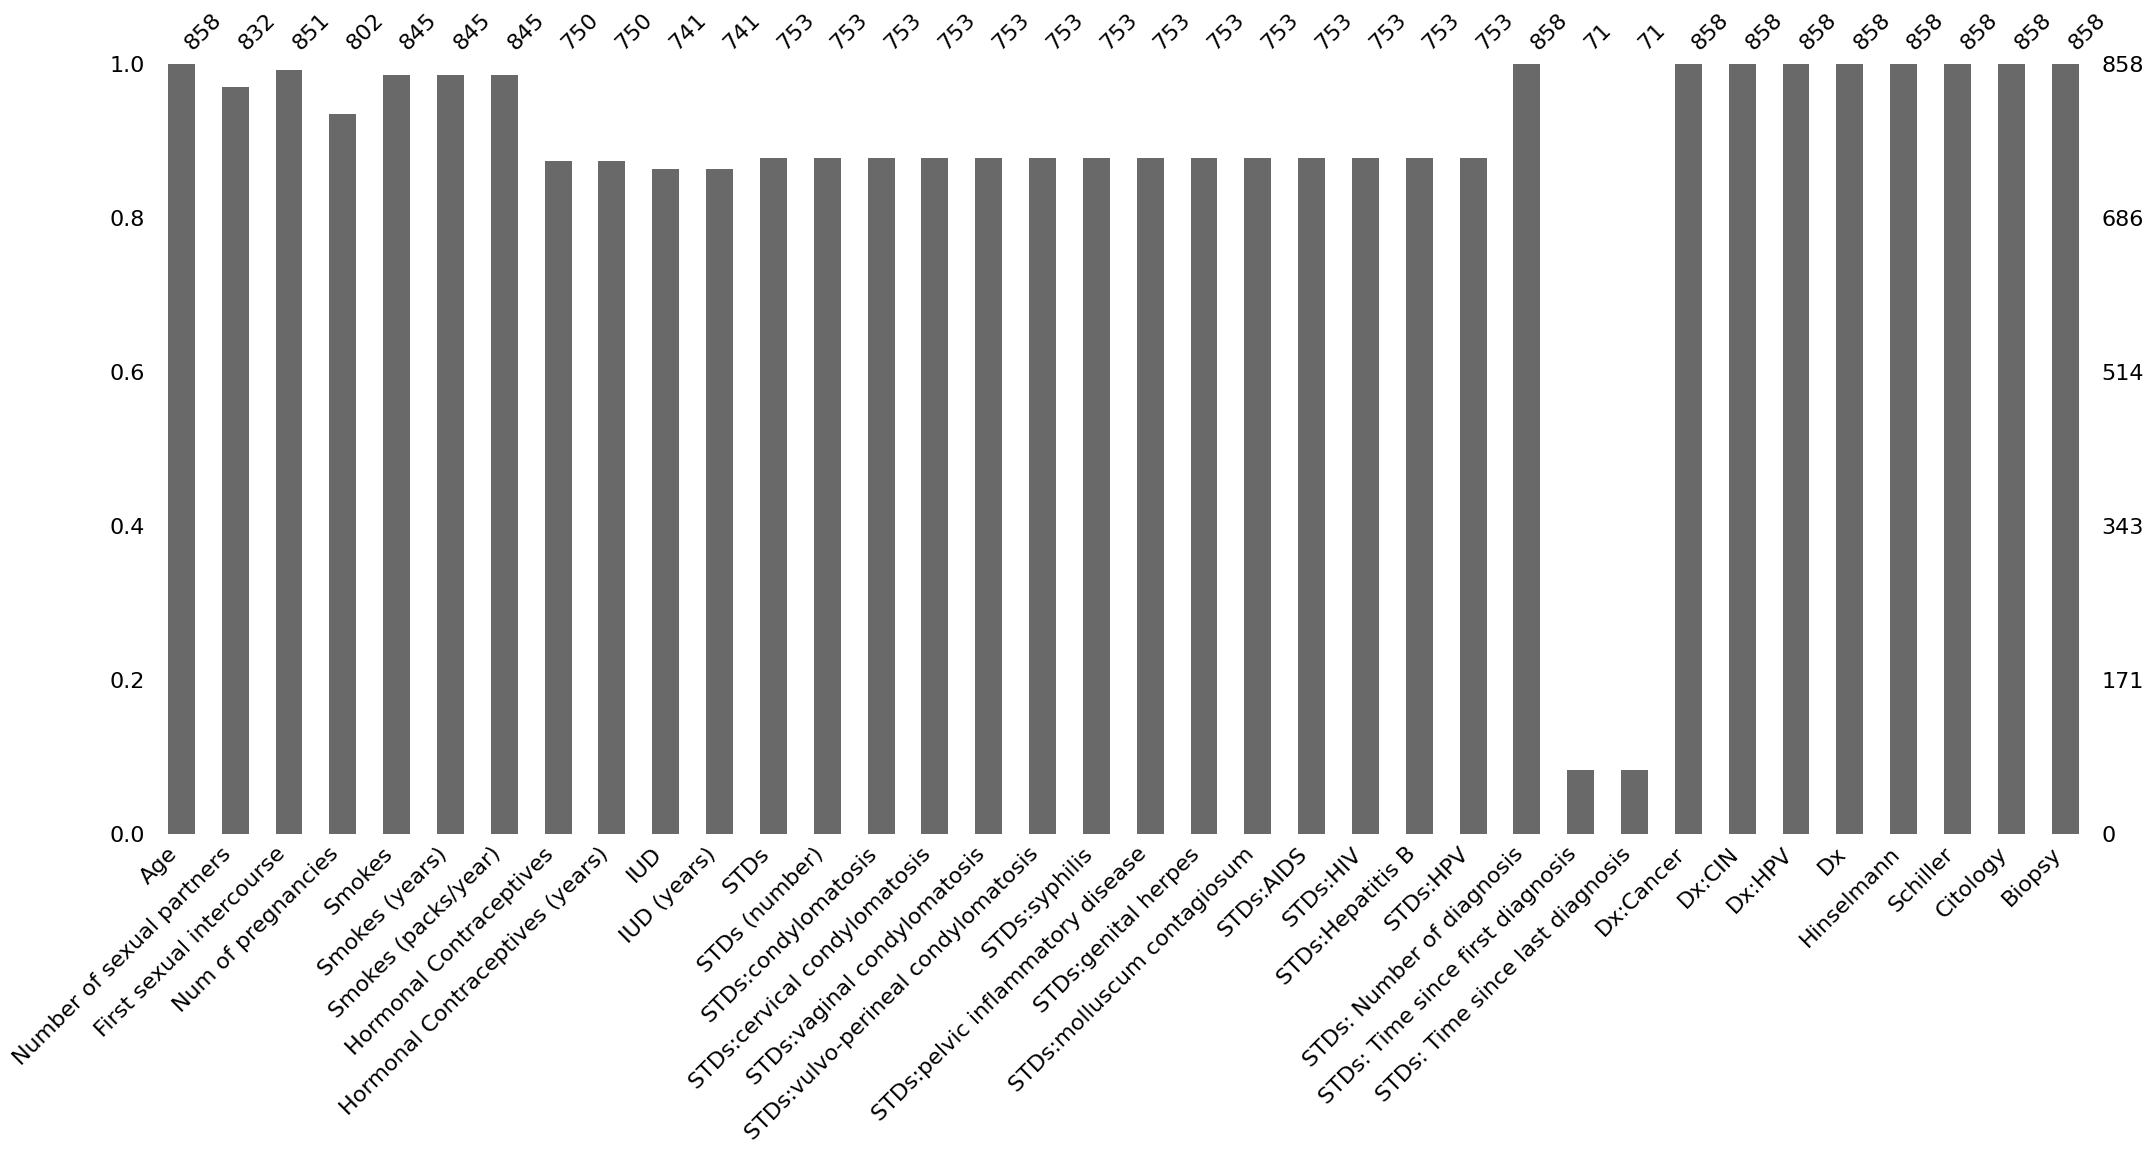

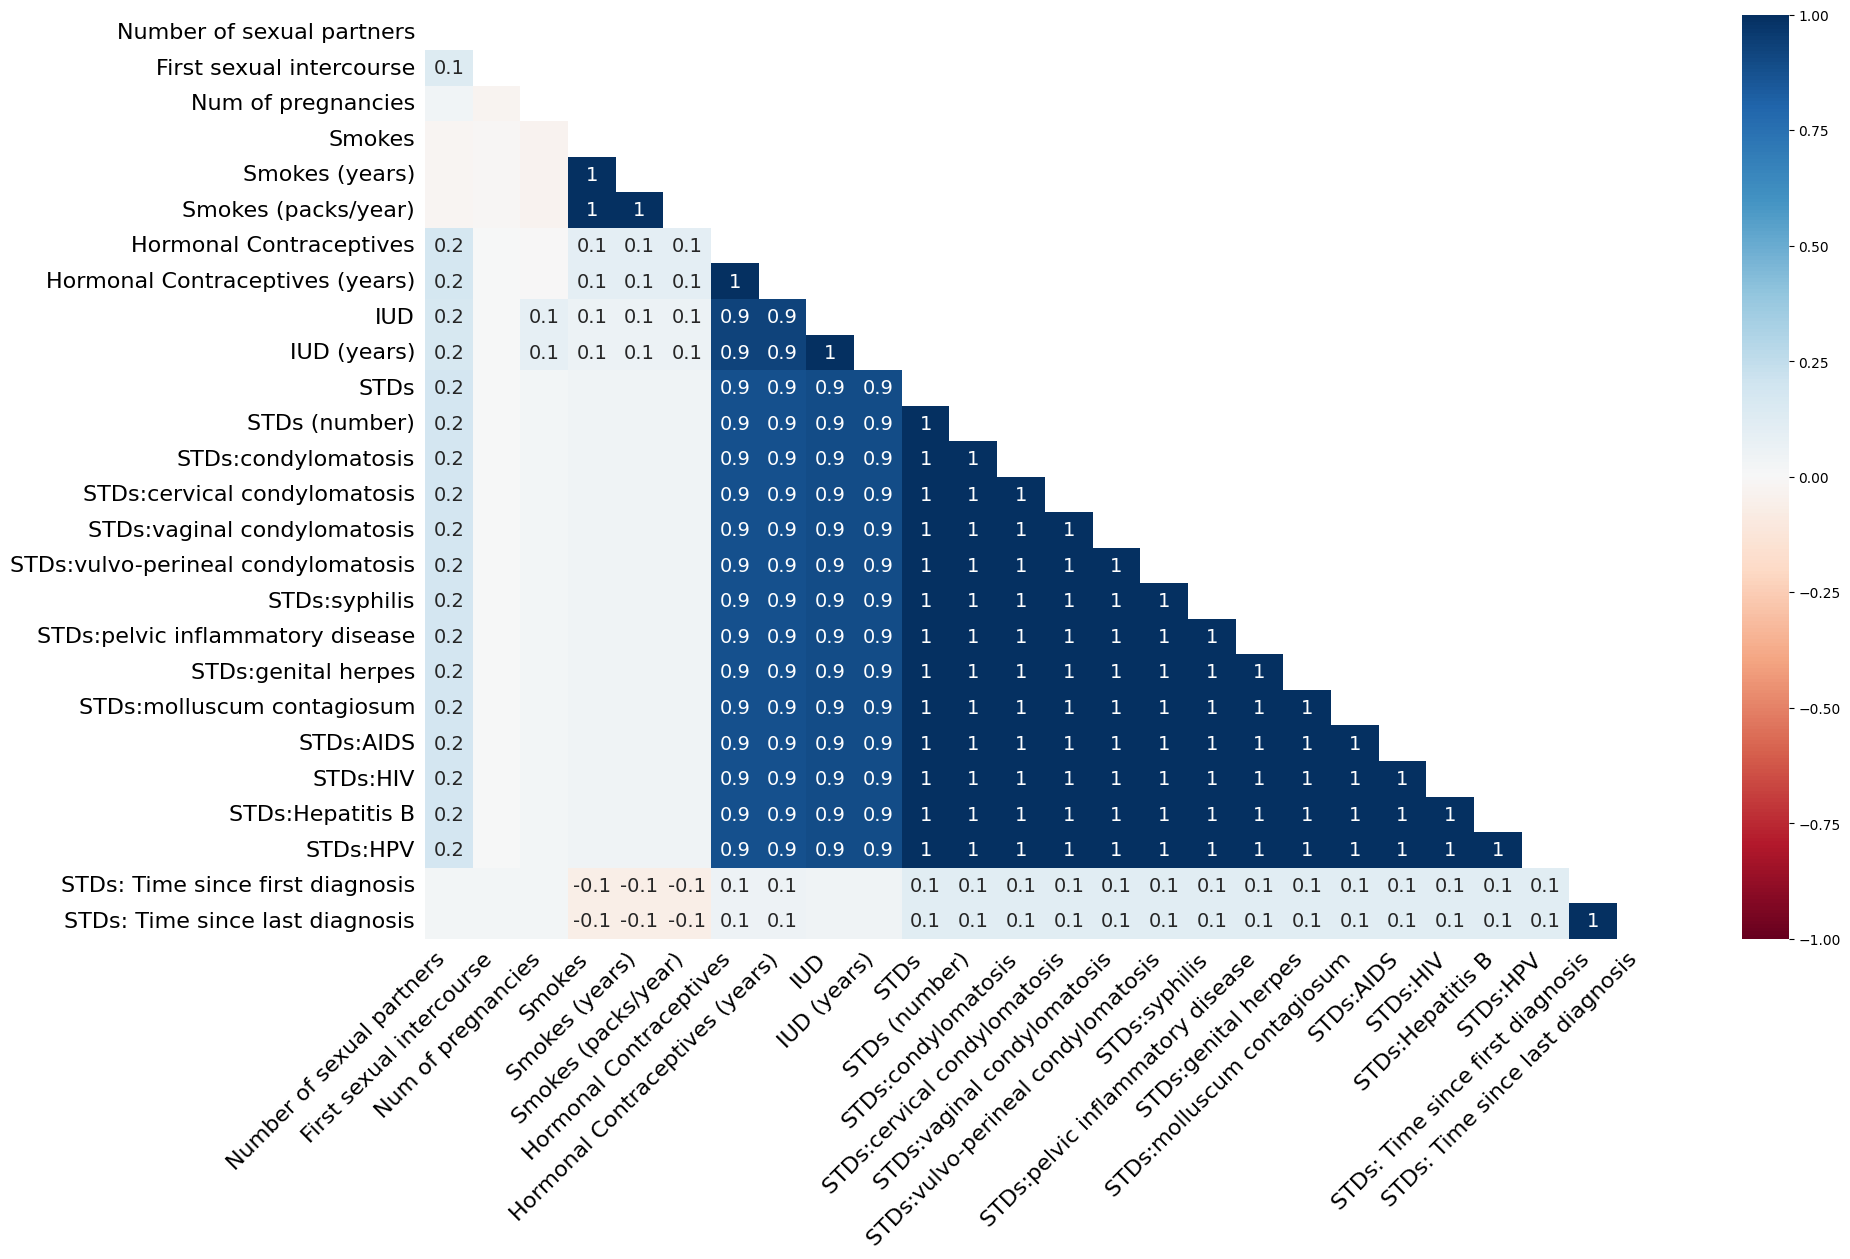

In [ ]:
# Missing data matrix to visualize the pattern of missing values in the dataset
print(msno.bar(df)) #visualizing the number of missing values as a bar chart

print(msno.heatmap(df)) #heatmap showing the correlation of missingness between every 2 columns

In [25]:
df["Schiller"].value_counts(dropna=True)

Schiller
0    784
1     74
Name: count, dtype: int64

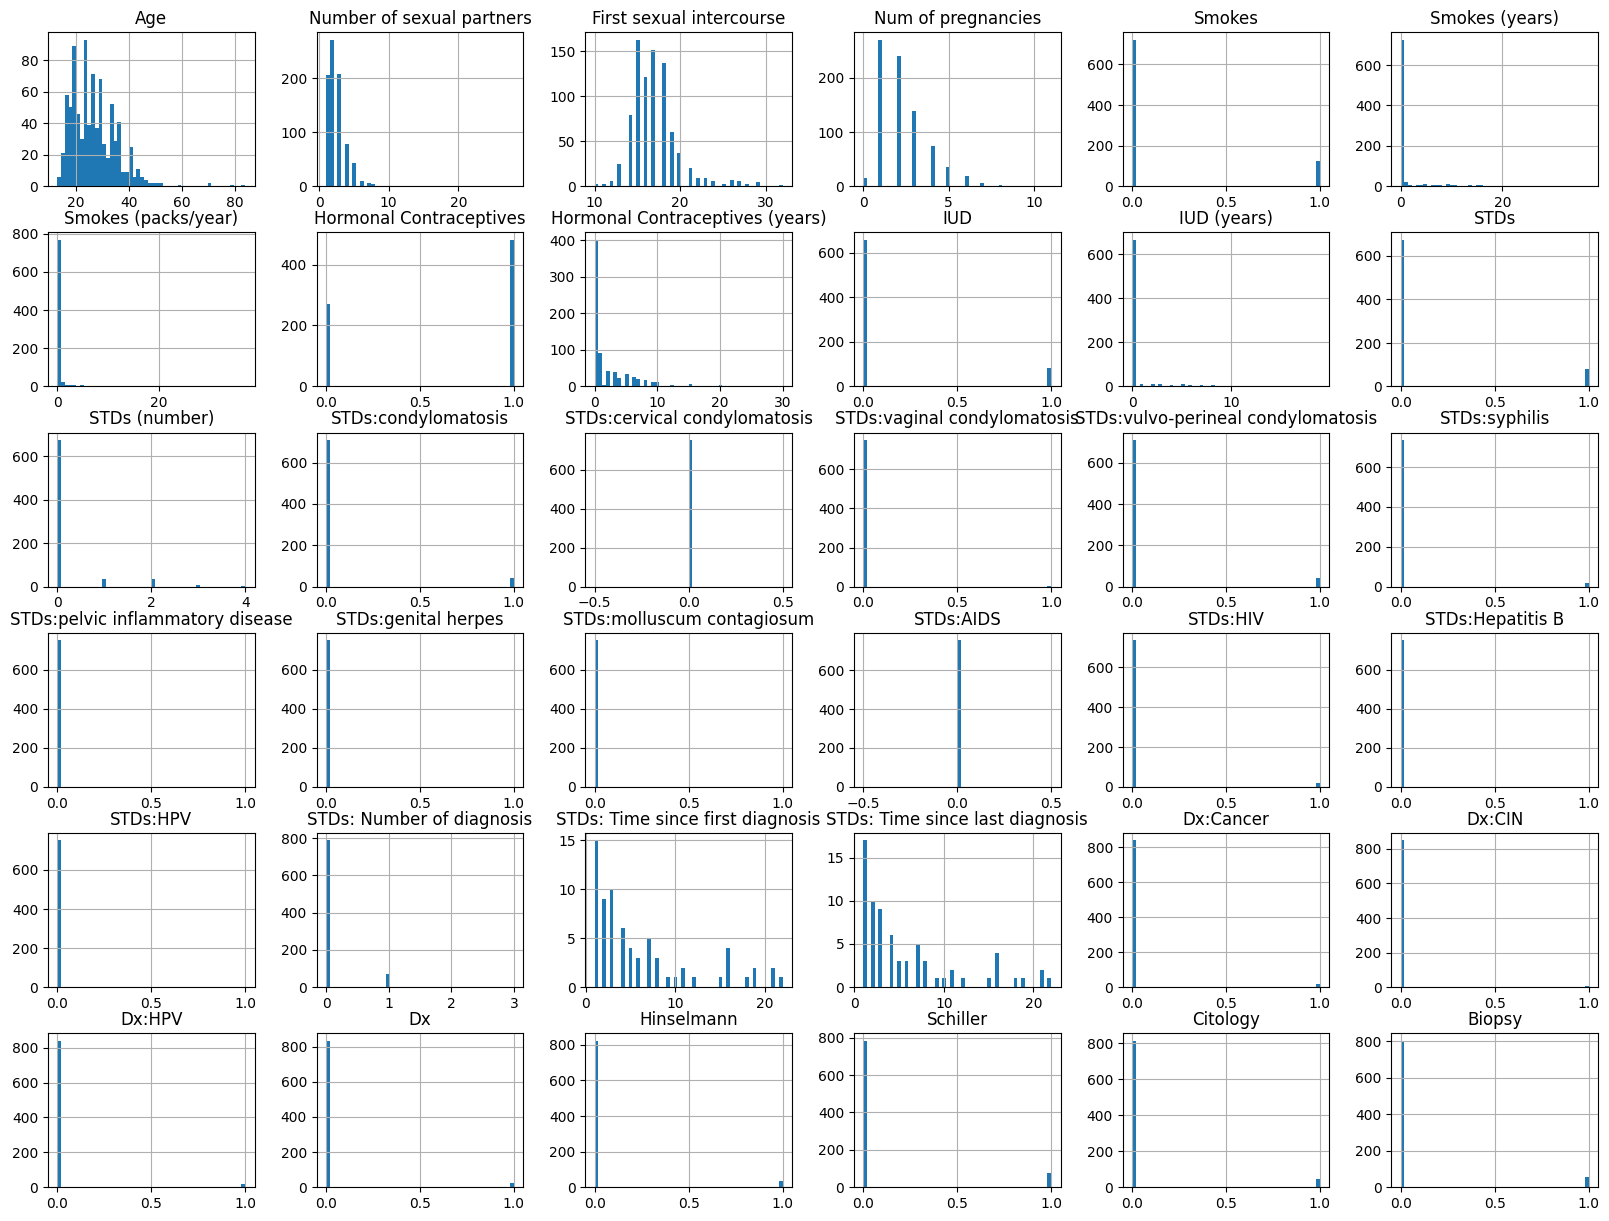

In [ ]:
#plotting all the histograms of the numerical features to understand their distributions.
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

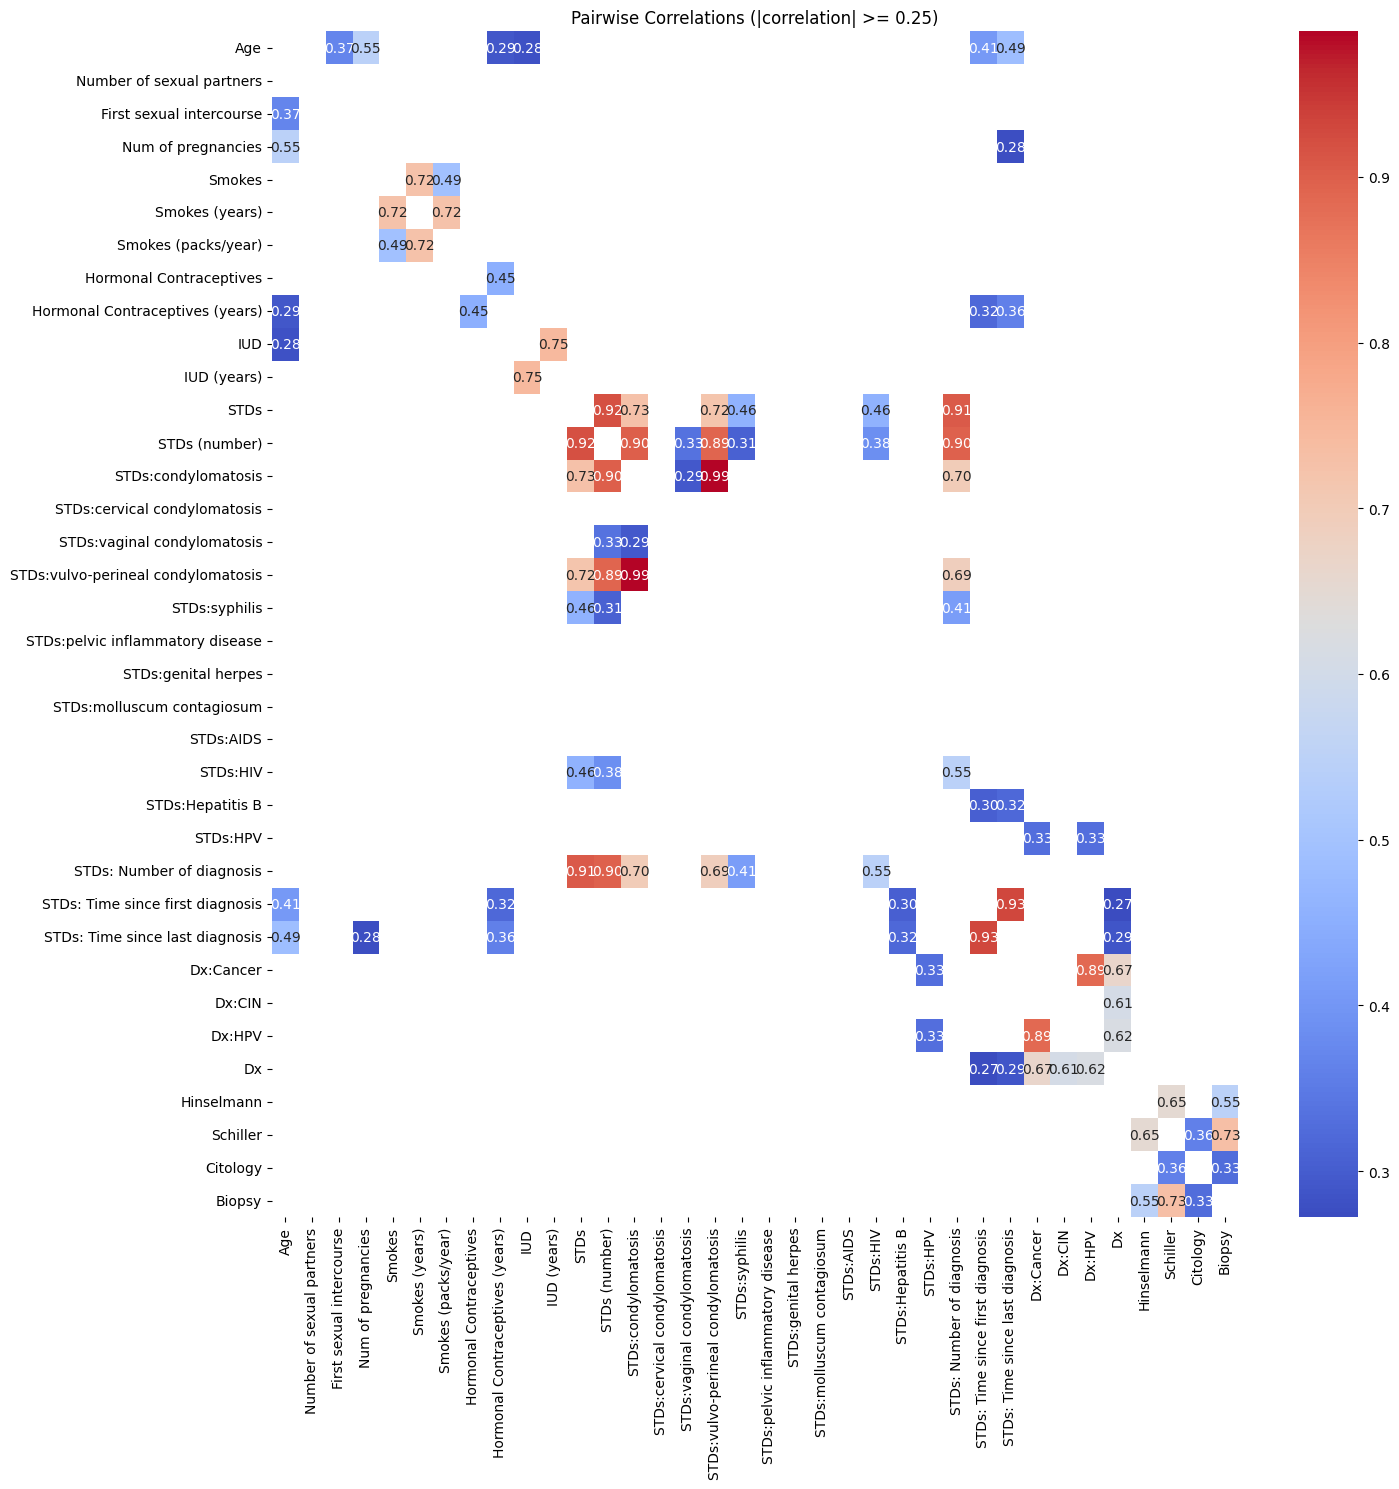

In [ ]:
#Showing the correlation matrix with a threshold of 0.25 to focus on stronger correlations.

correlation_matrix = df.select_dtypes(include=['number']).corr()  
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() >= 0.25]  
filtered_correlation_matrix[np.eye(filtered_correlation_matrix.shape[0], dtype=bool)] = np.nan
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pairwise Correlations (|correlation| >= 0.25)")
plt.tight_layout()